# Reproducibility test: Experiments using the same seed should produce the same outputs

In [1]:
from rewann.tools.compare_experiments import assemble_dataframe
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
base_path = "../data/iris_reproducibility"
spec_path = os.path.join(base_path, 'iris_reproducibility_spec.toml')
data_path = os.path.join(base_path, 'data')
df = assemble_dataframe(spec_path, data_path,
         map_from_params=dict(
            seed=['sampling', 'seed'],
         ))
df = df.sort_values(by=['seed'])

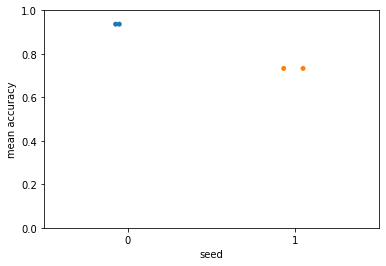

In [3]:
sns.stripplot(x="seed", y="mean accuracy", data=df)
plt.ylim([0,1])
plt.show()

In [4]:
for s in np.unique(df['seed']):
    acc_s = df[df['seed'] == s]['mean accuracy']
    assert np.min(acc_s) == np.max(acc_s)
print('Ok.')

Ok.
